#Overview
  In this project, I aimed to develop a binary classification model to discern the quality of wines as either good or bad based on their physicochemical properties. Leveraging the Wine Quality Dataset, which includes comprehensive information about various aspects of wine composition, I opted for a Naive Bayes Classifier.

   This choice was motivated by the dataset's provision of continuous features, aligning well with the assumptions of the Naive Bayes algorithm. The objective was clear: predict the quality of wines using a set of features.
   
   Importantly, it's crucial to emphasize that the code is designed exclusively for personal academic and practice purposes, explicitly excluding any commercial or profit-driven applications. All credit for original concepts and code snippets derived from external sources has been appropriately acknowledged.



# Dataset
Cortez et al., 2009. UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/186/wine+quality].

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

# References
1.  FreeCodeCamp (2022) "Machine Learning for Everybody – Full Course" [https://www.youtube.com/watch?v=i_LwzRVP7bg&t=6680s]

2. Normalized Nerd (2021) "Naive Bayes Classifier in Python (from scratch!)"[https://youtu.be/3I8oX3OUL6I?si=xfFwzxHKmcgge4Ao]

3. Mahesh Dongare (2023) "ML_Wine_Classification" [https://www.kaggle.com/code/maheshdongare/ml-wine-classification]



# Importing libraries

In [6]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Preparing data

In [4]:
#read data dari file csv
data = pd.read_csv("wine.csv")

#display the first 10 samples
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


good    855
bad     744
Name: quality, dtype: int64


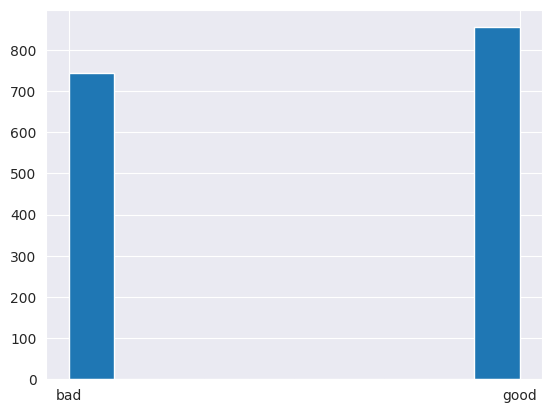

In [7]:
#generate histogram for quality (label) column
data["quality"].hist()

In [9]:
class_distribution = data["quality"].value_counts()
print(class_distribution)

good    855
bad     744
Name: quality, dtype: int64


There is an imbalanced class, which the "good" class is significantly more prevelent than the other class. This can be handeled by adding a resampling function such as oversampling or undersampling.

In this case, considering that the difference in both classes is not very significant. then, it may be reasonable to proceed with the existing dataset to make the practice more simple.


In [10]:
#converts 'quality' that in form of Strings to boolean data types
data["quality"] =(data["quality"] == "good").astype(int)

df["quality"] == "good": This creates a Boolean Series where each element is True if the value of it in the "quality" column is "good".

Otherwise, If the "quality" is anything other than "good," the corresponding value will be False. This applies specifically to instances where the "quality" column contains the label "bad."


<Axes: >

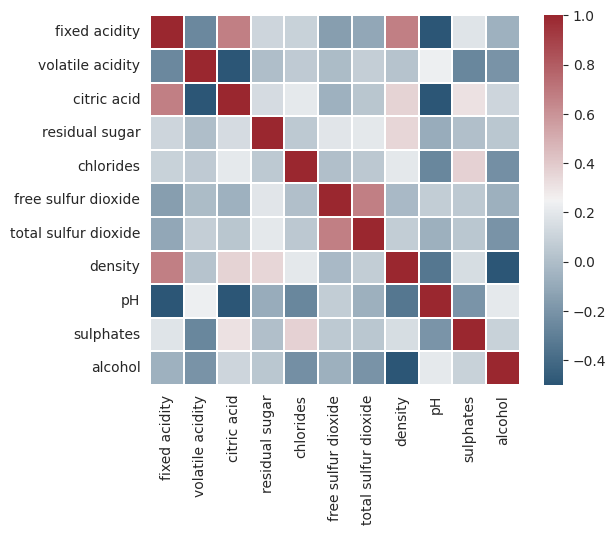

In [19]:
#find the correlation between features
corr = data.iloc[:, :-1].corr(method="pearson")
cmap = sns.diverging_palette(240, 10, 75, 35, center='light', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin= -.5, cmap=cmap, square=True, linewidths= .2 )

It turns out that none of the features are highly correlated with each other, which means that we can include all the features in the same dataset.

# Bayes' Theorem

P(A|B) = [P(B|A) * P(A)]/ P(B)

where:

P(A|B) is a posterior and means the possibility of A occuring given that B has occured.

P(B|A) is a prior and means the possibility of B occuring given that A has occured.

P(A) is a prior and means a posibility A occuring.

P(B) is an evidence




# Calculate Prior

In [ ]:
def calculate_prior (df, Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

`[df[y]]== i]`
where i is the label which either 1 or 0. However, this command alone doesn't give us a new data frame.

# Calculate likelihood using Gaussian distribution

In [4]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y]==label]
  mean, std = df[feat_name].mean(), df[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2 * std**2)))
  return p_x_given_y

since there is none of the standard deviation is zero for a particular class, which this occur because a zero standard deviation implies that all the values in the class are the same, we do not need to add a small epsilon to the denominator to avoid division by zero.

#Calculate the probability of each wine's quality

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        #find the maximum value
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

# Test the gaussian model

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="quality")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))